<AxesSubplot:ylabel='Linjenavn'>

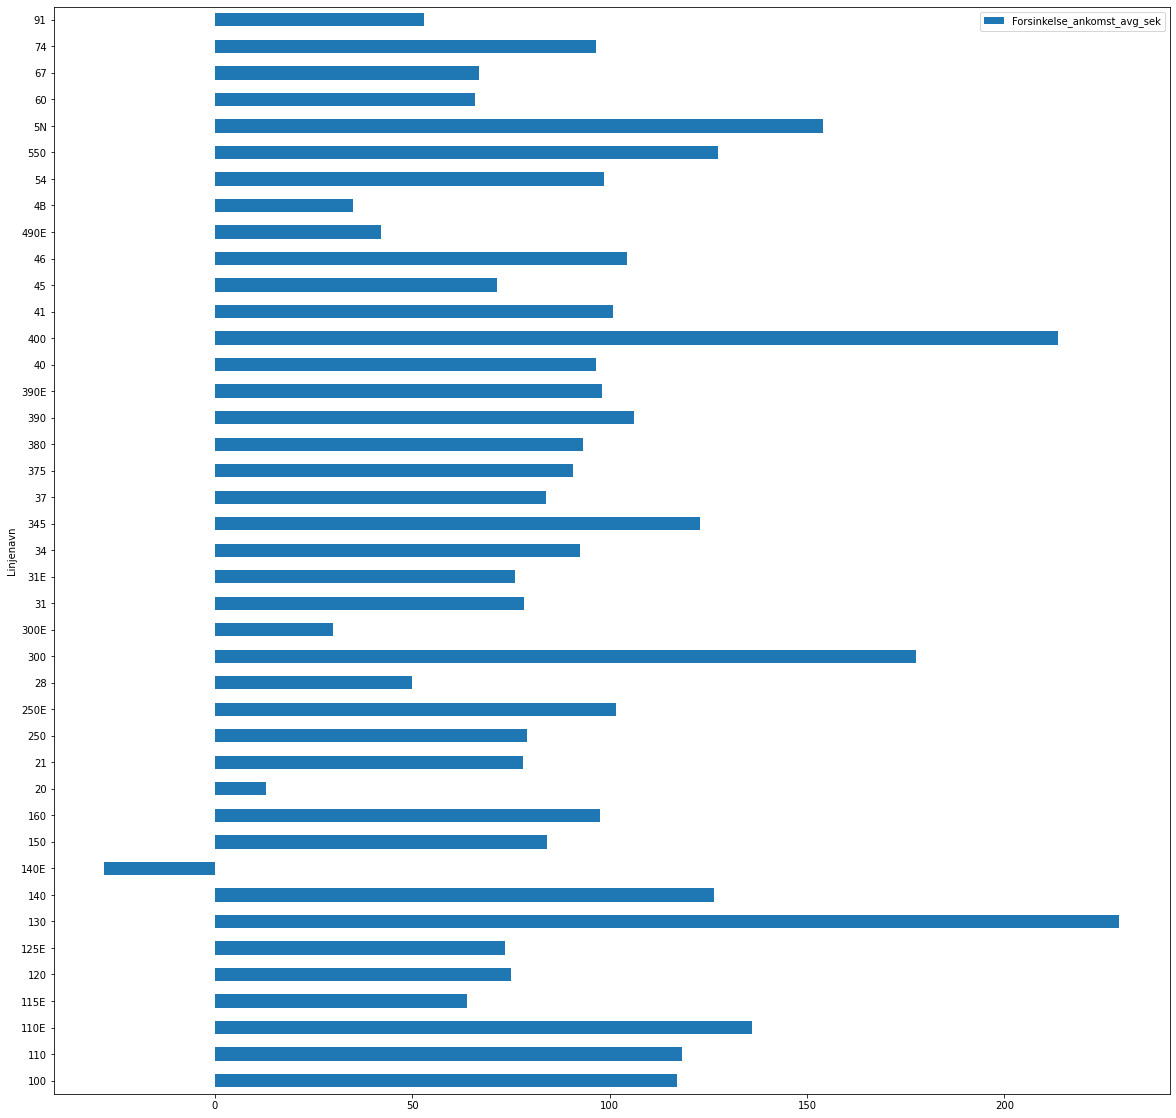

In [25]:
import pandas as panda 
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
#Leser inn csv filen og setter opp en delimiter så den blir lesbar
dataframe = panda.read_csv('Ruter_data.csv',delimiter=';')
timedeltaplanlagt = panda.to_timedelta(dataframe['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])
timedeltafaktisk = panda.to_timedelta(dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')

#Her lager jeg en ny kolonne hvor jeg har kalkulert differansen mellom faktisk og planlagt ankomst i sekunder
dataframe['Differanse_ankomst'] = panda.to_timedelta(timedeltafaktisk - timedeltaplanlagt) / np.timedelta64(1,'s')

#Filtrer ut Viken
is_oslo = dataframe.Fylke == 'Oslo'
oslo_data = dataframe[is_oslo]

#Her dropper jeg alle rader som inneholder manglende verdier, i dette tilfellet manglet vi klokkeslett for faktisk ankomst
nullvalues = oslo_data[oslo_data.isna().any(axis=1)]
oslo_data = oslo_data.dropna()

#Tegner graf
tidsbruklinjetype = oslo_data[['Linjenavn','Differanse_ankomst']]
threshold_max = tidsbruklinjetype['Differanse_ankomst'].quantile(0.90)
threshold_min = tidsbruklinjetype['Differanse_ankomst'].quantile(0.10)
new_tidsbruklinjetype=tidsbruklinjetype[(tidsbruklinjetype['Differanse_ankomst']<threshold_max)&(tidsbruklinjetype['Differanse_ankomst']>threshold_min)]
tidsbruklinjetype_gruppert = new_tidsbruklinjetype.groupby('Linjenavn').mean()
tidsbruklinjetype_gruppert.rename(columns={'Differanse_ankomst' : 'Forsinkelse_ankomst_avg_sek'}, inplace=True)
tidsbruklinjetype_gruppert.plot(figsize=(20,20),kind='barh')